# Folder

```
CREATE TABLE folders(
    id   BIGINT      NOT NULL,
    name VARCHAR(50) NOT NULL,
    CONSTRAINT folders_pk PRIMARY KEY (id)
);

```
## solution_folders table
| id | name |
|----|------|
| 1 | People Space|
| 2 | India|
| 3 | Global|
| 4 | CSR India|
| 5 | Talent Acquisition|
| 6 | Employee Experience|
| 7 | Total Rewards|
| 8 | Employee Benefits|
| 9 | Timeoff|
| 10 | Online Doctor Consultation|
| 11 | Daycare program|
| 12 | Holidays|
| 13 | Practo|
| 14 | Medibuddy|
| 15 | Holiday calendar 2023|
| 16 | IT BU|
| 17 | Freddy|
| 18 | Engineering|
| 19 | Tech Design |
| 20 | Virtual Agent|
| 21 | Q2C|


## Folder Hierarchy

### Step 1 - Create a Graph

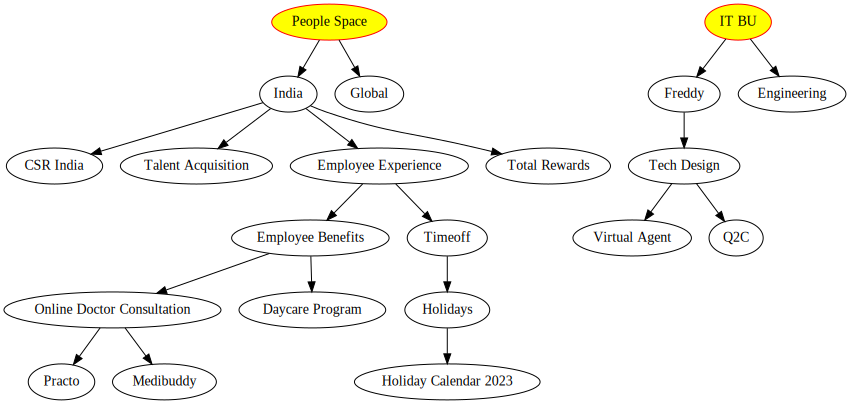

In [2]:
# import graph visualization
import graphviz

# define graph
folder_data = '''
digraph Folders {
    
    // Root folder 1 -
    
    "People Space" -> "India" -> "CSR India"
    "People Space" -> "Global"
    "India" -> "Talent Acquisition"
    "India" -> "Employee Experience" -> "Employee Benefits" -> "Online Doctor Consultation" -> "Practo"
    "India" -> "Total Rewards"
    "Employee Benefits" -> "Daycare Program"
    "Employee Experience" -> "Timeoff" -> "Holidays" -> "Holiday Calendar 2023"
    "Online Doctor Consultation" -> "Medibuddy"
    

    //Color codes
    "People Space" [color = red, fillcolor=yellow, style=filled]
    
    // Root folder 2
    "IT BU" [color = red, fillcolor=yellow, style=filled]
    "IT BU" -> "Freddy" -> "Tech Design"
    "Tech Design" -> "Virtual Agent"
    "Tech Design" -> "Q2C"
    "IT BU" -> "Engineering"
}
'''
folders = graphviz.Source(folder_data)
folders


# Folder Graph representation in MySQL

Maintain a separate table called `kbase_folder_hierarchy` to store the folder hierarchy

- Create an edge from each vertex pointing to `self` -- this gives tree height as `0` --
- Create a Parent child entry for each immediate child -- this gives the tree height as `1` --

| parent | child | height | 
|----------|------------|--------|
| 1| 1| 0 |
| 1 | 2| 1 |
| 1| 3| 1|
| 2| 2| 0 |
| 2 | 4| 1 |
| 2 | 5| 1 |
| 2 | 6| 1|
| 2 | 7| 1|
| 3| 3| 0|
| 4| 4| 0|
| 5| 5| 0|
| 6| 6| 0|
| 6| 8| 1|
| 6| 9| 1|
| 7| 7| 0|
| 8| 8| 0|
| 8| 10| 1|
| 8| 11| 1|
| 9| 9| 0|
| 9| 12| 1|
| 10| 10| 0|
| 10| 13| 1|
| 10| 14| 1|
| 11| 11| 0|
| 12| 12| 0|
| 12| 15| 1|
| 13| 13| 0|
| 14| 14| 0|
| 15| 15| 0|
| 16| 16| 0|
| 16| 17| 1|
| 16| 18| 1|
| 17| 17| 0|
| 17| 19| 1|
| 18| 18| 0|
| 19| 19| 0|
| 19| 20| 1|
| 19| 21| 1|
| 20| 20| 0|
| 21| 21| 0|

- The above hierarchy representation gives ability to query the `immediate child` & `immediate parent`


## Create Edges to all descendents in tree

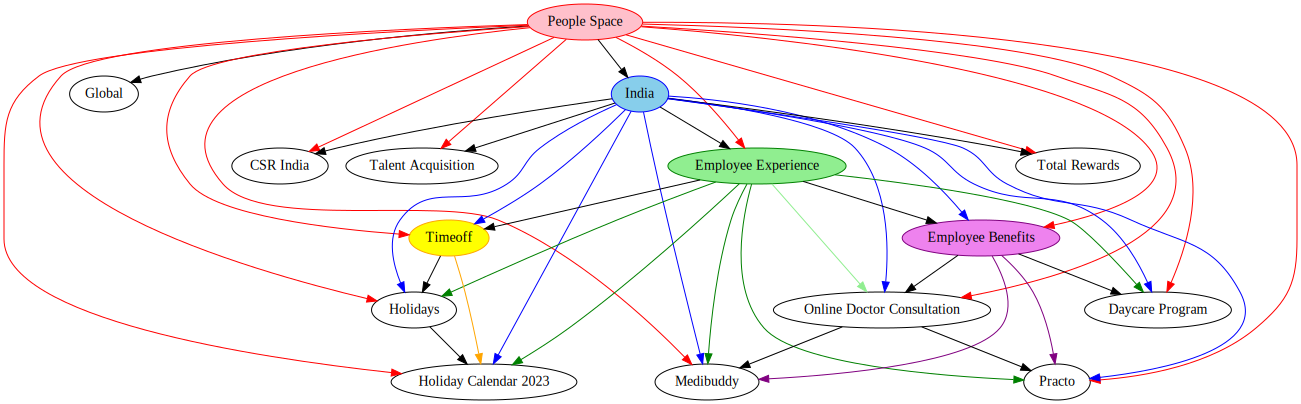

In [21]:


folder_hierarchy = '''
digraph Folders {
    
    // Root folder 1 -
    
    "People Space" -> "India" -> "CSR India"
    "People Space" -> "Global"
    "India" -> "Talent Acquisition"
    "India" -> "Employee Experience" -> "Employee Benefits" -> "Online Doctor Consultation" -> "Practo"
    "India" -> "Total Rewards"
    "Employee Benefits" -> "Daycare Program"
    "Employee Experience" -> "Timeoff" -> "Holidays" -> "Holiday Calendar 2023"
    "Online Doctor Consultation" -> "Medibuddy"
    
    //Color codes
    "People Space" [color = red, fillcolor=pink, style=filled]

    //Create Edge to all descendents of "People Space"
    "People Space" -> "CSR India" [color="red"]
    "People Space" -> "Talent Acquisition" [color="red"]
    "People Space" -> "Employee Experience" [color="red"]
    "People Space" -> "Employee Benefits" [color="red"]
    "People Space" -> "Online Doctor Consultation" [color="red"]
    "People Space" -> "Practo" [color="red"]
    "People Space" -> "Total Rewards" [color="red"]
    "People Space" -> "Daycare Program" [color="red"]
    "People Space" -> "Timeoff" [color="red"]
    "People Space" -> "Holidays" [color="red"]
    "People Space" -> "Holiday Calendar 2023" [color="red"]
    "People Space" -> "Medibuddy" [color="red"]

    //Create Edge to all descendents of "India"
    "India" [color = blue, fillcolor=skyblue, style=filled]

    "India" -> "Employee Benefits" [color="blue"]
    "India" -> "Timeoff" [color="blue"]
    "India" -> "Online Doctor Consultation" [color="blue"]
    "India" -> "Daycare Program" [color="blue"]
    "India" -> "Holidays" [color="blue"]
    "India" -> "Practo" [color="blue"]
    "India" -> "Medibuddy" [color="blue"]
    "India" -> "Holiday Calendar 2023" [color="blue"]

    //Create Edge to all descendents of "Employee Experience"
    "Employee Experience" [color = green, fillcolor=lightgreen, style=filled]

    "Employee Experience" -> "Online Doctor Consultation" [color="lightgreen"]
    "Employee Experience" -> "Daycare Program" [color="green"]
    "Employee Experience" -> "Holidays" [color="green"]
    "Employee Experience" -> "Practo" [color="green"]
    "Employee Experience" -> "Medibuddy" [color="green"]
    "Employee Experience" -> "Holiday Calendar 2023" [color="green"]
    
    //Create Edge to all descendents of "Employee Benefits"
    "Employee Benefits" [color = purple, fillcolor=violet, style=filled]

    "Employee Benefits" -> "Practo" [color="purple"]
    "Employee Benefits" -> "Medibuddy" [color="purple"]

    //Create Edge to all descendents of "Timeoff"
    "Timeoff" [color = orange, fillcolor=yellow, style=filled]

    "Timeoff" -> "Holiday Calendar 2023" [color="orange"]
    
}
'''
hierarchy = graphviz.Source(folder_hierarchy)
hierarchy
